# Strava fitness data analysis

# Process

## Key Tasks

1.Check the data for errors.
2.Choose your tools.
3.Transform the data so you can work with it effectively.
4.Document the cleaning process.

## Deliverable

Documentation of any cleaning or manipulation of data. It is the below steps:

## Load libraries and datasets

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## We will focus on:

In [17]:
pwd

'C:\\Users\\admin\\Downloads'

In [18]:
daily_activity = pd.read_csv("dailyActivity_merged.csv")

In [19]:
daily_calories = pd.read_csv("dailyCalories_merged.csv")

In [20]:
daily_steps = pd.read_csv("dailySteps_merged.csv")

In [21]:
daily_sleep = pd.read_csv("sleepDay_merged.csv")

## Clean Data

## Check unique user id

In [22]:
print("daily_activity: ", daily_activity["Id"].nunique())

daily_activity:  33


In [23]:
print("daily_calories: ", daily_calories["Id"].nunique())

daily_calories:  33


In [24]:
print("daily_steps: ", daily_steps["Id"].nunique())

daily_steps:  33


In [25]:
print("daily_sleep: ", daily_sleep["Id"].nunique())

daily_sleep:  24


## Check for duplicates

In [26]:
print("daily_activity: ", daily_activity.duplicated().sum())

daily_activity:  0


In [27]:
print("daily_caloreis: ", daily_calories.duplicated().sum())

daily_caloreis:  0


In [28]:
print("daily_steps: ", daily_steps.duplicated().sum())

daily_steps:  0


In [29]:
print("daily_sleep: ", daily_sleep.duplicated().sum())

daily_sleep:  3


## Remove duplicates daily_sleep dataset

In [30]:
daily_sleep.drop_duplicates(inplace=True)

In [31]:
print("daily_sleep: ", daily_sleep.duplicated().sum())

daily_sleep:  0


## Check null values

In [32]:
print("daily_activity: ", daily_activity.isnull().sum())

daily_activity:  Id                          0
ActivityDay                 0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


In [33]:
print("daily_calories: ", daily_calories.isnull().sum())

daily_calories:  Id             0
ActivityDay    0
Calories       0
dtype: int64


In [34]:
print("daily_steps: ", daily_steps.isnull().sum())

daily_steps:  Id             0
ActivityDay    0
StepTotal      0
dtype: int64


In [35]:
print("daily_sleep: ", daily_sleep.isnull().sum())

daily_sleep:  Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64


## Clean and rename columns for consistency 

## Change all columns to lowercase

In [36]:
daily_activity.columns = daily_activity.columns.str.lower()

In [37]:
daily_calories.columns = daily_calories.columns.str.lower()

In [38]:
daily_steps.columns = daily_steps.columns.str.lower()

In [39]:
daily_sleep.columns = daily_sleep.columns.str.lower()

## Check the table

In [40]:
daily_activity.head()

,id,activityday,totalsteps,totaldistance,trackerdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
0,1503960366,04/12/2016,13162,8.50,8.50,1.88,0.55,6.06,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,1.57,0.69,4.71,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,2.44,0.40,3.91,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,2.14,1.26,2.83,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,2.71,0.41,5.04,36,10,221,773,1863


In [41]:
daily_activity.describe() 

,id,totalsteps,totaldistance,trackerdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7640.619149,5.489702,5.475351,1.502681,0.567543,3.340819,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5090.237269,3.924606,3.907276,2.658941,0.883580,2.040655,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,1.945000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.210000,0.240000,3.365000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,2.052500,0.800000,4.782500,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030000,28.030000,21.920000,6.480000,10.710000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [45]:
daily_activity["activityday"] = pd.to_datetime(
    daily_activity["activityday"], format="%m/%d/%Y")

In [46]:
daily_calories["activityday"] = pd.to_datetime(
    daily_calories["activityday"], format="%m/%d/%Y")

In [47]:
daily_steps["activityday"] = pd.to_datetime(
    daily_steps["activityday"], format="%m/%d/%Y")

In [48]:
daily_sleep["sleepday"] = pd.to_datetime(
    daily_sleep["sleepday"], format="%m/%d/%Y")

In [49]:
daily_activity.head()

,id,activityday,totalsteps,totaldistance,trackerdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
0,1503960366,2016-04-12,13162,8.50,8.50,1.88,0.55,6.06,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,1.57,0.69,4.71,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,2.44,0.40,3.91,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,2.14,1.26,2.83,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,2.71,0.41,5.04,36,10,221,773,1863


In [50]:
daily_calories.head()

,id,activityday,calories
0,1503960366,2016-04-12,1985
1,1503960366,2016-04-13,1797
2,1503960366,2016-04-14,1776
3,1503960366,2016-04-15,1745
4,1503960366,2016-04-16,1863


In [51]:
daily_steps.head()

,id,activityday,steptotal
0,1503960366,2016-04-12,13162
1,1503960366,2016-04-13,10735
2,1503960366,2016-04-14,10460
3,1503960366,2016-04-15,9762
4,1503960366,2016-04-16,12669


In [52]:
daily_sleep.head()

,id,sleepday,totalsleeprecords,totalminutesasleep,totaltimeinbed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


## Merge daily_activity and daily_calories on Id and date columns

In [53]:
daily_activity_calories = pd.merge(
    daily_activity,
    daily_calories,
    left_on=["id", "activityday"],
    right_on=["id", "activityday"],
    how="inner",)

In [54]:
daily_activity_calories.head()

,id,activityday,totalsteps,totaldistance,trackerdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories_x,calories_y
0,1503960366,2016-04-12,13162,8.50,8.50,1.88,0.55,6.06,25,13,328,728,1985,1985
1,1503960366,2016-04-13,10735,6.97,6.97,1.57,0.69,4.71,21,19,217,776,1797,1797
2,1503960366,2016-04-14,10460,6.74,6.74,2.44,0.40,3.91,30,11,181,1218,1776,1776
3,1503960366,2016-04-15,9762,6.28,6.28,2.14,1.26,2.83,29,34,209,726,1745,1745
4,1503960366,2016-04-16,12669,8.16,8.16,2.71,0.41,5.04,36,10,221,773,1863,1863


In [55]:
daily_activity_calories = pd.merge(
    daily_activity_calories,
    daily_sleep,
    left_on=["id", "activityday"],
    right_on=["id", "sleepday"],
    how="inner",)

In [56]:
daily_activity_calories.head()

,id,activityday,totalsteps,totaldistance,trackerdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories_x,calories_y,sleepday,totalsleeprecords,totalminutesasleep,totaltimeinbed
0,1503960366,2016-04-12,13162,8.50,8.50,1.88,0.55,6.06,25,13,328,728,1985,1985,2016-04-12,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,1.57,0.69,4.71,21,19,217,776,1797,1797,2016-04-13,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,2.14,1.26,2.83,29,34,209,726,1745,1745,2016-04-15,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,2.71,0.41,5.04,36,10,221,773,1863,1863,2016-04-16,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,3.19,0.78,2.51,38,20,164,539,1728,1728,2016-04-17,1,700,712


## Analyze

## Activity vs. Calories
Calculate the correlation between total steps or very active minutes and calories burnt. This can provide insights into how activity levels influence caloric burn.

## Calculate the correlation between total steps and calories burnt

In [57]:
correlation_steps_calories = daily_activity_calories['totalsteps'].corr(daily_activity_calories['calories_y'])

In [58]:
print('Correlation between total steps and calories burnt: ', correlation_steps_calories)

Correlation between total steps and calories burnt:  0.40461133970534174


## Calculate the correlation between very active minutes and calories burnt

In [59]:
correlation_active_minutes_calories = daily_activity_calories['veryactiveminutes'].corr(daily_activity_calories['calories_y'])

In [60]:
print('correlation between very active minutes and calories burnt: ', correlation_active_minutes_calories)

correlation between very active minutes and calories burnt:  0.6111982924396088


## Segmentation based on daily steps

In [61]:
daily_avg = daily_activity_calories.groupby('id').agg({
    'totalsteps': 'mean',
    'calories_y': 'mean',
    'totalminutesasleep': 'mean' }).reset_index()
# Assuming 'totalsleeprecords' is the relevant column for sleep data.

In [62]:
# Rename columns for clarity

daily_avg.columns = ['id', 'mean_daily_steps', 'mean_daily_calories', 'mean_daily_sleep']

In [63]:
daily_avg.head()

,id,mean_daily_steps,mean_daily_calories,mean_daily_sleep
0,1503960366,12507.520000,1872.280000,360.280000
1,1644430081,7967.750000,2977.750000,294.000000
2,1844505072,3477.000000,1676.333333,652.000000
3,1927972279,1490.000000,2316.200000,417.000000
4,2026352035,5618.678571,1540.785714,506.178571


In [64]:
def classify_by_steps(average_steps):
    if average_steps < 5000:
        return "Sedentary"
    elif 5000 <= average_steps < 7500:
        return "Lightly active"
    elif 7500 <= average_steps < 10000:
        return "Fairly active"
    else:
        return "Very active"

In [65]:
# Apply the function to the 'mean_daily_steps' column to create a new 'Activity_Category' column

daily_avg['Activity_Category'] = daily_avg['mean_daily_steps'].apply(classify_by_steps)

In [66]:
# Display the updated dataframe with the new 'Activity_Category' column

daily_avg.head()

,id,mean_daily_steps,mean_daily_calories,mean_daily_sleep,Activity_Category
0,1503960366,12507.520000,1872.280000,360.280000,Very active
1,1644430081,7967.750000,2977.750000,294.000000,Fairly active
2,1844505072,3477.000000,1676.333333,652.000000,Sedentary
3,1927972279,1490.000000,2316.200000,417.000000,Sedentary
4,2026352035,5618.678571,1540.785714,506.178571,Lightly active


In [67]:
# Group by 'Activity_Category' and count each group

user_type_percent = daily_avg.groupby('Activity_Category').size().reset_index(name='total')

In [68]:
# Calculate the total number of users

user_type_percent['totals'] = user_type_percent['total'].sum()

In [72]:
# Calculate the percentage for each user type

user_type_percent['total_percent'] = user_type_percent['total'] / user_type_percent['totals']

In [73]:
# Convert the percentage to a readable format

user_type_percent['percentage%'] = user_type_percent['total_percent'].apply(lambda x: f"{x*100:.2f}%")


In [74]:
# Reorder the levels of the user type

ordered_categories = ["Very active", "Fairly active", "Lightly active", "Sedentary"]
user_type_percent['Activity_Category'] = pd.Categorical(user_type_percent['Activity_Category'], categories=ordered_categories, ordered=True)
user_type_percent = user_type_percent.sort_values('Activity_Category')


In [75]:
user_type_percent

,Activity_Category,total,totals,total_percent,percentage%
3,Very active,5,24,0.208333,20.83%
0,Fairly active,9,24,0.375000,37.50%
1,Lightly active,5,24,0.208333,20.83%
2,Sedentary,5,24,0.208333,20.83%


## draw a pie chart for each category

In [76]:
# Data for the pie chart

labels = user_type_percent["Activity_Category"]
sizes = user_type_percent["total_percent"]

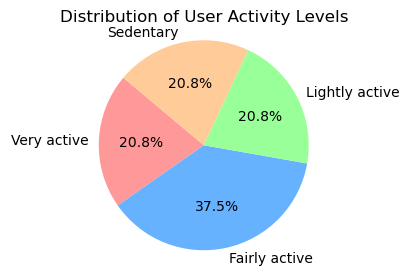

In [78]:
# Plotting the pie chart

plt.figure(figsize=(5, 3))
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=140,
    colors=["#ff9999", "#66b2ff", "#99ff99", "#ffcc99"],
)
plt.axis("equal")                # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of User Activity Levels")
plt.show()

## Based on the provided results, here are some conclusions we can draw:

1. Distribution of User Types: The highest percentage of users fall under the "Fairly active" category, making up 37.50% of the total users.The categories "Very active", "Lightly active", and "Sedentary" each represent 20.83% of the total users, indicating an equal distribution among these three categories.

2.Activity Insights: Almost 40% of the users are fairly active, suggesting that a significant portion of users are engaging in a moderate amount of physical activity.
The fact that the categories "Very active", "Lightly active", and "Sedentary" have equal distributions might indicate a balanced user base in terms of their activity levels.

3.Marketing or Product Development Implications: Since "Fairly active" is the most common category, marketing campaigns or product features that target this group might be effective.
Given that there's an equal distribution among the "Very active", "Lightly active", and "Sedentary" categories, it might be worth exploring differentiated marketing strategies or product features tailored to each of these user types.

4.User Behavior: Despite the availability and capabilities of the smart device, one-fifth of the users are categorized as "Sedentary". This might raise questions about why these users have such devices if they aren't very active. It might be for tracking other health metrics, or perhaps they are looking for motivation to become more active.

In summary, understanding the distribution of user activity levels provides valuable insights into user behavior and can guide decision-making in marketing, product development, and user engagement strategies.

## Trend analysis
Analyze trends over time. Do users trend to be more active (and burn more calories) on specific days of the week.

In [80]:
print(daily_activity_calories.columns)

Index(['id', 'activityday', 'totalsteps', 'totaldistance', 'trackerdistance',
       'veryactivedistance', 'moderatelyactivedistance', 'lightactivedistance',
       'veryactiveminutes', 'fairlyactiveminutes', 'lightlyactiveminutes',
       'sedentaryminutes', 'calories_x', 'calories_y', 'sleepday',
       'totalsleeprecords', 'totalminutesasleep', 'totaltimeinbed'],
      dtype='object')


In [81]:
print(daily_avg.columns)

Index(['id', 'mean_daily_steps', 'mean_daily_calories', 'mean_daily_sleep',
       'Activity_Category'],
      dtype='object')


## Merge daily_avg with daily_activity_calories

In [82]:
daily_activity_calories_avg = pd.merge(
    daily_activity_calories, daily_avg, on="id", how="inner")

In [83]:
daily_activity_calories_avg.head()

,id,activityday,totalsteps,totaldistance,trackerdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,veryactiveminutes,fairlyactiveminutes,...,calories_x,calories_y,sleepday,totalsleeprecords,totalminutesasleep,totaltimeinbed,mean_daily_steps,mean_daily_calories,mean_daily_sleep,Activity_Category
0,1503960366,2016-04-12,13162,8.50,8.50,1.88,0.55,6.06,25,13,...,1985,1985,2016-04-12,1,327,346,12507.52,1872.28,360.28,Very active
1,1503960366,2016-04-13,10735,6.97,6.97,1.57,0.69,4.71,21,19,...,1797,1797,2016-04-13,2,384,407,12507.52,1872.28,360.28,Very active
2,1503960366,2016-04-15,9762,6.28,6.28,2.14,1.26,2.83,29,34,...,1745,1745,2016-04-15,1,412,442,12507.52,1872.28,360.28,Very active
3,1503960366,2016-04-16,12669,8.16,8.16,2.71,0.41,5.04,36,10,...,1863,1863,2016-04-16,2,340,367,12507.52,1872.28,360.28,Very active
4,1503960366,2016-04-17,9705,6.48,6.48,3.19,0.78,2.51,38,20,...,1728,1728,2016-04-17,1,700,712,12507.52,1872.28,360.28,Very active


In [84]:
most_active_day_mean = daily_activity_calories_avg.groupby("activityday")[
    "totalsteps"].mean()

In [106]:
# Convert the DatetimeIndex to day names

most_active_day_mean_daynames = most_active_day_mean.index.day_name()

In [107]:
# Group by these day names and calculate the mean steps

grouped_day_mean = most_active_day_mean.groupby(most_active_day_mean_daynames).mean()

In [108]:
grouped_day_mean

activityday
Friday       7988.698360
Monday       9262.150524
Saturday     9857.248626
Sunday       7295.100790
Thursday     7810.362436
Tuesday      9183.084799
Wednesday    8025.138182
Name: totalsteps, dtype: float64

## Ensure the data is sorted by the desired order of days for visual clarity

In [109]:
order_of_days = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

# Plotting

## Plotting the data using seaborn

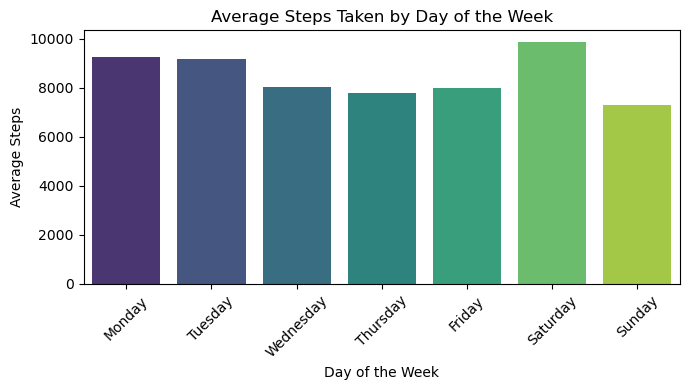

In [116]:
plt.figure(figsize=(7, 4))
sns.barplot(
    x=grouped_day_mean.index,
    y=grouped_day_mean.values,
    order=order_of_days,
    palette="viridis",
)
plt.title("Average Steps Taken by Day of the Week")
plt.ylabel("Average Steps")
plt.xlabel("Day of the Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion

1.Activity Levels: A significant portion of users are classified as "Fairly active" with a noticeable balance among the "Very active", "Lightly active", and "Sedentary" categories. This suggests a diverse user base in terms of activity levels.

2.Activity Trends: Saturdays are the most active days for users in terms of steps, while Sundays are the least active. This implies weekend habits vary, with users being more active at the start of the weekend and slowing down by its end.

3.Logged Activities and Calories: There's a positive relationship between the distance of logged activities and the total calories burned.

##  Application of Insights

1.Targeted Marketing and Product Features: Knowing the activity habits of users can guide targeted marketing campaigns. For instance, motivating messages or challenges can be sent on Sundays to boost activity.

2.Enhanced Features: The surprising efficiency of "Sedentary" users can be further explored, possibly leading to new features that track non-step-based activities more effectively.

3.Goal Setting Features: With many users reaching or exceeding caloric burn goals, the app could introduce dynamic goal-setting features to challenge users based on their past performance.